In [1]:
from kid_readout.analysis import noise_measurement, archive
plt.rcParams['font.size'] = 11

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [2]:
df = archive.load_archive('/data/readout/archive/2015-04-293001_mmw_156_GHz.npy')

In [44]:
t3 = '/home/data2/2015-05-01_142609_mmw_156_GHz.nc'
snms = noise_measurement.load_noise_pkl('/data/readout/pkl/2015-05-01_142609_mmw_156_GHz.pkl')
snms[0].mmw_atten_turns

array([ 3.,  3.])

In [22]:
atten = 23
on1 = [snm for snm in snms if (snm.atten==atten) & (snm.timestream_modulation_duty_cycle==0) & (snm.resonator_index==1)].pop()
on3 = [snm for snm in snms if (snm.atten==atten) & (snm.timestream_modulation_duty_cycle==0) & (snm.resonator_index==3)].pop()
df_mask = (df.mmw_atten_total_turns/2==3) & (df.atten==atten) & (df.timestream_modulation_duty_cycle==0)
df1 = df[df_mask & (df.resonator_index==1)]
df3 = df[df_mask & (df.resonator_index==3)]

In [23]:
dXdP1 = float(df1.zbd_power_dX_dP)
dXdP1

16.56220145383243

In [24]:
dXdP3 = float(df3.zbd_power_dX_dP)
dXdP3

13.715101492291064

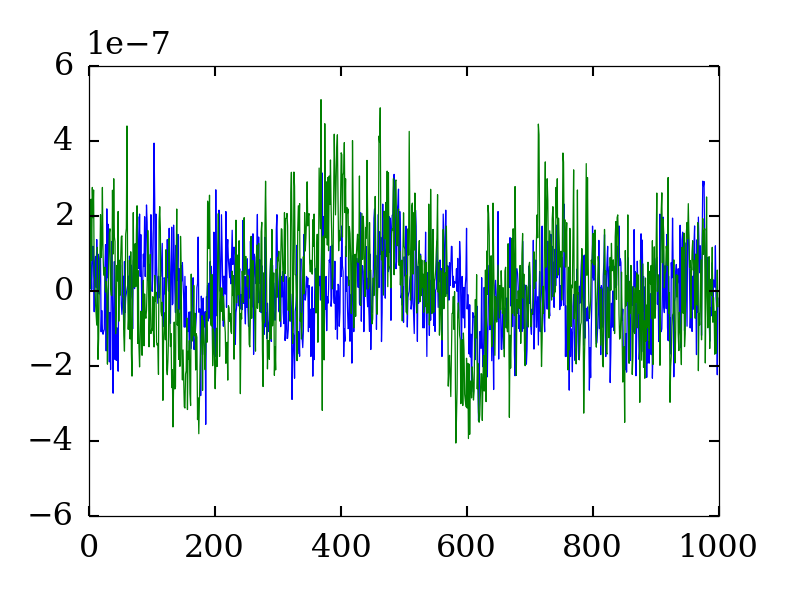

In [25]:
end = 1e3
plt.plot(on1.fractional_fluctuation_timeseries.real[:end])
plt.plot(on3.fractional_fluctuation_timeseries.real[:end])

In [26]:
np.log2(on1.fractional_fluctuation_timeseries.size)

19.0

In [27]:
NFFT = 2**16

p11, f = plt.mlab.psd(on1.fractional_fluctuation_timeseries.real, Fs=on1.timeseries_sample_rate, NFFT=NFFT)
p33, f = plt.mlab.psd(on3.fractional_fluctuation_timeseries.real, Fs=on3.timeseries_sample_rate, NFFT=NFFT)
p13, f = plt.mlab.csd(on1.fractional_fluctuation_timeseries.real, on3.fractional_fluctuation_timeseries.real, Fs=on3.timeseries_sample_rate, NFFT=NFFT)

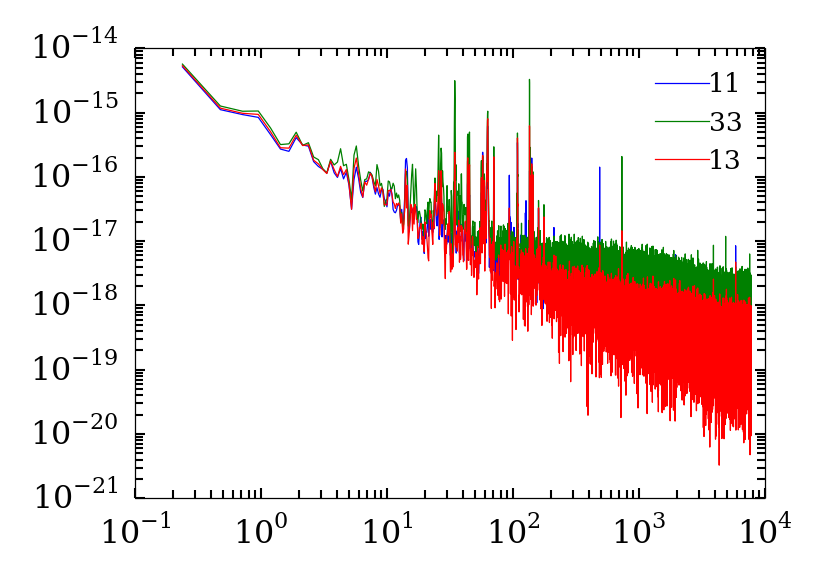

In [39]:
plt.loglog(f, p11, label='11')
plt.loglog(f, p33, label='33')
plt.loglog(f, abs(p13), label='13')
plt.legend(loc='best', fontsize='xx-small')

(1e-19, 1e-16)

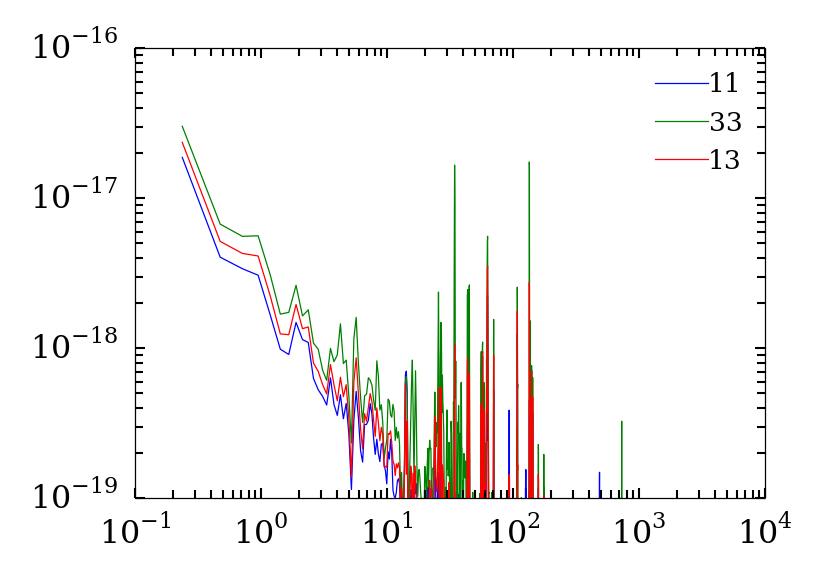

In [29]:
plt.loglog(f, p11 / dXdP1**2, label='11')
plt.loglog(f, p33 / dXdP3**2, label='33')
plt.loglog(f, abs(p13) / (dXdP1 * dXdP3), label='13')
plt.legend(loc='best', fontsize='xx-small')
plt.ylim(1e-19, 1e-16)

# Time-ordered data in units of ZBD power

In [30]:
on1.Z = on1.fractional_fluctuation_timeseries.real / dXdP1
on3.Z = on3.fractional_fluctuation_timeseries.real / dXdP3

In [34]:
on1.Zm = on1.Z - on3.Z  # (on1.Z + on3.Z) / 2
on3.Zm = on3.Z - on1.Z  # (on1.Z + on3.Z) / 2

In [42]:
NFFT = 2**16

Z11, f = plt.mlab.psd(on1.Z, Fs=on1.timeseries_sample_rate, NFFT=NFFT)
Zm11, f = plt.mlab.psd(on1.Zm, Fs=on1.timeseries_sample_rate, NFFT=NFFT)
Z33, f = plt.mlab.psd(on3.Z, Fs=on3.timeseries_sample_rate, NFFT=NFFT)
Z13, f = plt.mlab.csd(on1.Z, on3.Z, Fs=on3.timeseries_sample_rate, NFFT=NFFT)

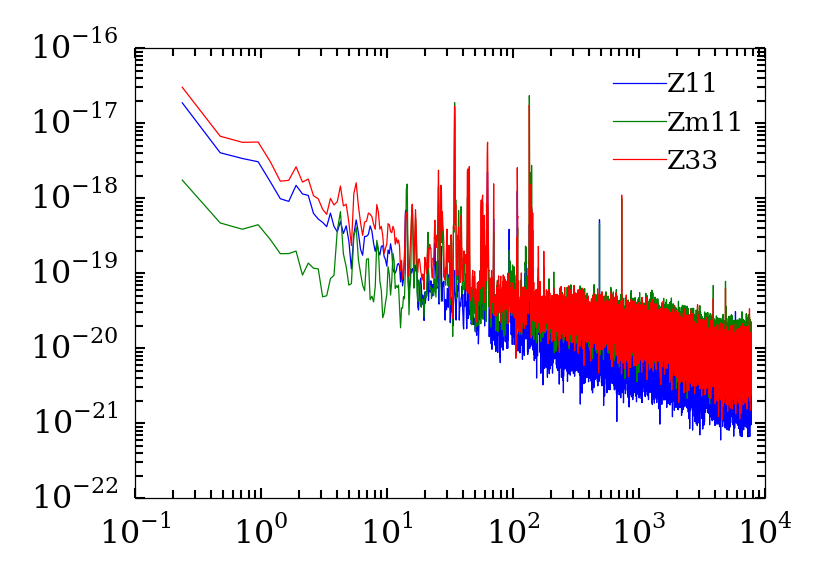

In [43]:
plt.loglog(f, Z11, label='Z11')
plt.loglog(f, Zm11, label='Zm11')
plt.loglog(f, Z33, label='Z33')
#plt.loglog(f, abs(Z13), label='Z13')
plt.legend(loc='best', fontsize='xx-small')
